<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/GraphOperation/HouseCentroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np

cells = cv2.imread('/content/Artboard 1 copy 4-4.png',0)
cells = 255 - cells
_, paths_mask = cv2.threshold(cells, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
ret,thresh = cv2.threshold(cells,100,255,cv2.THRESH_BINARY_INV)


labels= measure.label(thresh, background=0)
bg_label = labels[0,0]
labels[labels==bg_label] = 0 # Assign background label to 0

props = measure.regionprops(labels)
centroids = np.zeros(shape=(len(np.unique(labels)),2)) # Access the coordinates of centroids


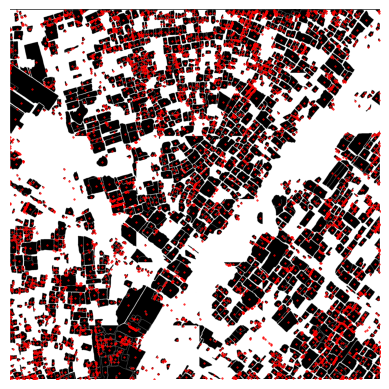

In [18]:
fig,ax = plt.subplots(1,1)
#plt.figure(figsize=(20, 20))
plt.axis('off')
ax.imshow(cells,cmap='gray')

for i,prop in enumerate(props):
    my_centroid = prop.centroid
    centroids[i,:]= my_centroid
    ax.plot(my_centroid[1],my_centroid[0],'r.',markersize=1)

plt.show()

In [20]:
len(centroids)

4817